Enter keyword/hashtag to be searched: tea
Enter the number of tweets to be analysed: 100
How people are reacting to  tea  by analysing  100  tweets:
Neutral


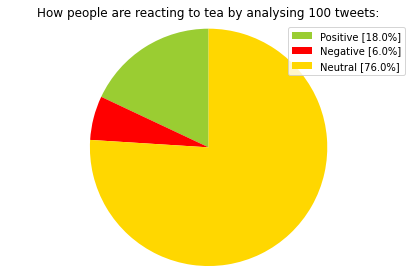

In [1]:
import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt
import os

def percentage(part, whole):
  return 100 * float(part)/float(whole)

#Twitter API credentials
consumerKey =  os.environ[CONSUMERKEY]
consumerSecret = os.environ[CONSUMERSECRET]
accessToken = os.environ[ACCESSTOKEN]
accessTokenSecret = os.environ[ACCESSTOKENSECRET]
#creating authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
#set access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate)

keyword = input("Enter keyword/hashtag to be searched: ")
no_of_tweets = int(input("Enter the number of tweets to be analysed: "))

tweets = tweepy.Cursor(api.search, keyword).items(no_of_tweets)

positive = 0
negative = 0
neutral = 0

for tweet in tweets:
  #print(tweet.text)
  analysis = TextBlob(tweet.text)

  if analysis.sentiment.polarity == 0.00:
    neutral = neutral + 1
  
  elif analysis.sentiment.polarity > 0.00:
    positive = positive + 1
  
  
  elif analysis.sentiment.polarity < 0.00:
    negative = negative + 1
  
positive = round(percentage(positive, no_of_tweets), 2)
negative = round(percentage(negative, no_of_tweets), 2)
neutral = round(percentage(neutral, no_of_tweets), 2)

print("How people are reacting to ", keyword, " by analysing ", no_of_tweets, " tweets:")
if positive > neutral and positive > negative:
  print("Positive")
elif negative > positive and negative > neutral:
  print("Negative")
else:
  print("Neutral")

labels = ["Positive ["+str(positive)+"%]", "Negative ["+str(negative)+"%]", "Neutral ["+str(neutral)+"%]"]
sizes = [positive, negative, neutral]
colours = ['yellowgreen', 'red', 'gold']
patches, texts = plt.pie(sizes, colors=colours, startangle=90)
plt.legend(patches, labels, loc='best')
plt.title("How people are reacting to "+keyword+ " by analysing "+str(no_of_tweets)+ " tweets:")
plt.axis("equal")
plt.tight_layout()
plt.show()
